                            **LGBM & XGBM**

**Objective:**
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 


**EDA**

In [23]:
import pandas as pd
train_df = pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\Titanic_train.csv')
test_df=pd.read_csv('C:\\Users\\rishi\\OneDrive\\Desktop\\DS Assigments\\Titanic_test.csv')
print(train_df)
print(test_df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [24]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Checking missing values**

In [26]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Histrogram**

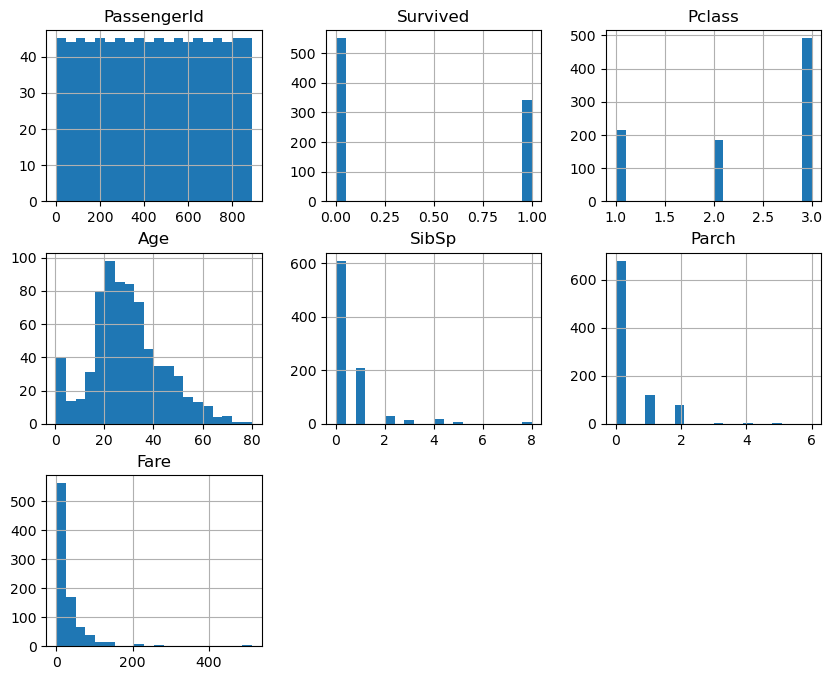

In [27]:
import matplotlib.pyplot as plt
train_df.hist(bins=20, figsize=(10, 8))
plt.show()

It provides a histogram for each numerical column in the train_df DataFrame The histograms are plotted with 20 bins and are displayed in a figure of size 10*8 inches
The train_df.hist(bins=20, figsize=(10, 8)) function creates a histogram for each feature in the dataset.
The bins-20 argument specifies that each histogram will use 20 bins to represent the distribution of values.
The figsize=(10,8) argument sets the size of the overall plot to 10 inches wide by 8 inches tall.
The plt.show() function displays the histogram.
A histogram helps in visualizing the distribution of data for each numerical feature revealing patterns such as central tendency, spread, and skewness of the data.




**Box Plot**

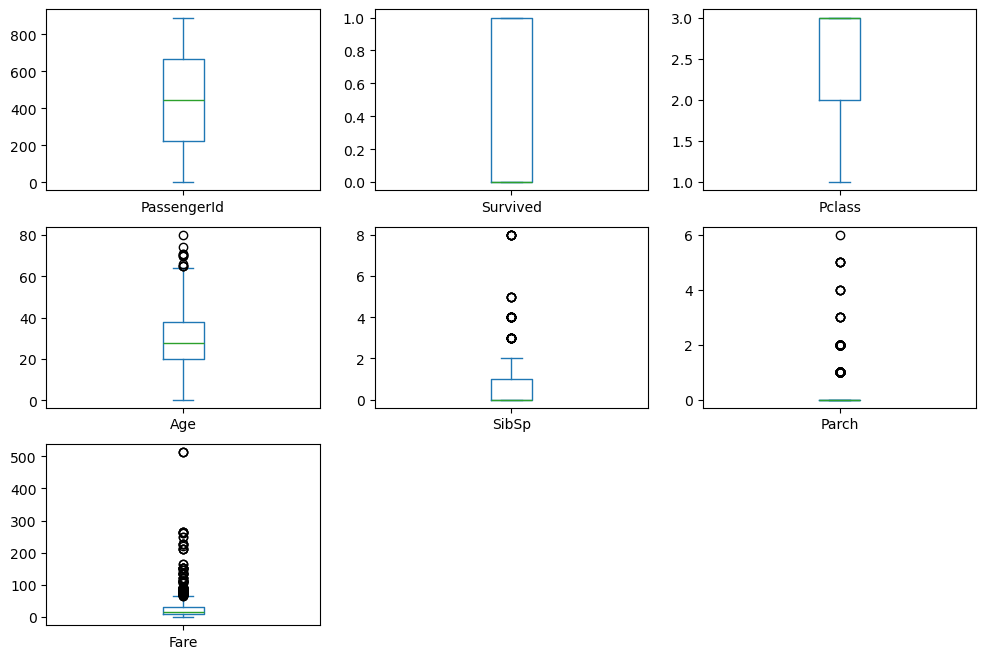

In [28]:
train_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8))
plt.show()

This generates a set of box plots for each feature in the train_df DataFrame By using train_df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 8)), created individual box plots for each column arranged in 3*3 grid with a figure size of 12*8 inches. The box plots help in visualizing the distribution of each feature including the median quartiles, and potential outliers.

**Visualize Relationships**

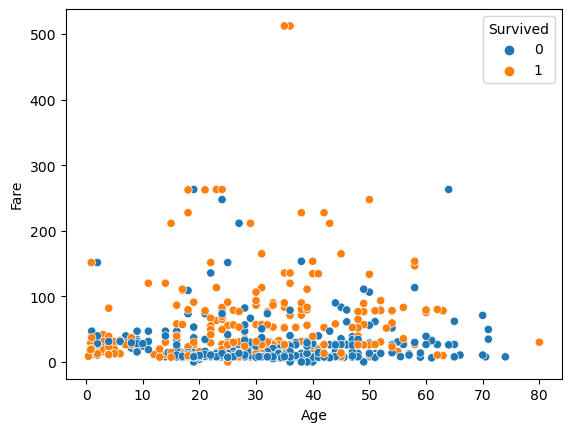

In [29]:
import seaborn as sns
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.show()

This scatter plot displays the relationship between ' Age', and 'Fare' in the train_df dataset with points colored based on the Survived status.
The x-axis represents the 'Age' of passengers while the y-axis represents the 'Fare' they paid.
The points are colored by the 'Survived' variable which indicates whether passengers survived or did not survive.
This plot helps in visualize how the age and fare of passengers relate to thair survival.

**Bar plot**

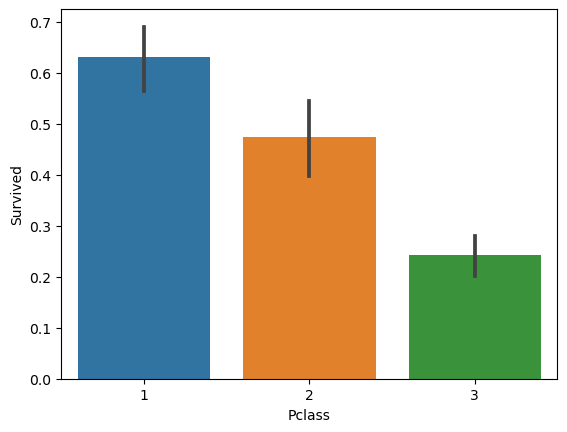

In [30]:
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.show()

**Impute Missing values**

In [31]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

In this code I handled missing values in the dataset. The missing values in the 'Age' column were filled with the median age, which will a right choice for numerical data as it misnimizes the impact of outliers. The missing values in the 'Embarked' column were filled with the most commont category (mode) checks that the dataset remains consistent and no data is lost.

**Encoding Categorical variables**

In [32]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

**Spliting the Dataset**

In [33]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=42)

In this code, the dataset is being prepared for training an ML model. The feature used for prediction is selected by dropping unnecessary columns like 'Survived', 'Name', 'Ticket', and 'Cabin'. The target variable is 'Survived' which indicates sets with 80% of the data used for training the model and 20% reserved for validation. The 'random_state=42' checks whether that the split is reproducible  (the same split will occur every time the code is run.)

**Building and Evaluating Models**

In [36]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
  Using cached xgboost-2.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.1-py3-none-win_amd64.whl (124.9 MB)


In [41]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_val)

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_val)

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision= precision_score(y_true,y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return accuracy, precision, recall, f1
lgb_results = evaluate_model(y_val, lgb_preds)
xgb_results = evaluate_model(y_val, xgb_preds)

print("LightGBM Results:", lgb_results)
print("XGBoost Results:", xgb_results)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In this code I have implemented two machine learning models, LightGBM and XGBoost to classify the data. First I have trained both models using the training dataset. Then I made predictions on the validation dataset (X_val)
To evaluate the performance of each model I defined a function evaluate_model() that calculates key metrics: Accuracy, Precision, Recall, and F1-Score. These metrics help us understand how well the models are performing in terms of correctly classify the data. At last, I have compared the results of the two models by printing out the evaluation metrics. This allows us to determine which model performed better on the validation dataset.

**Visualize and Comparing Results**

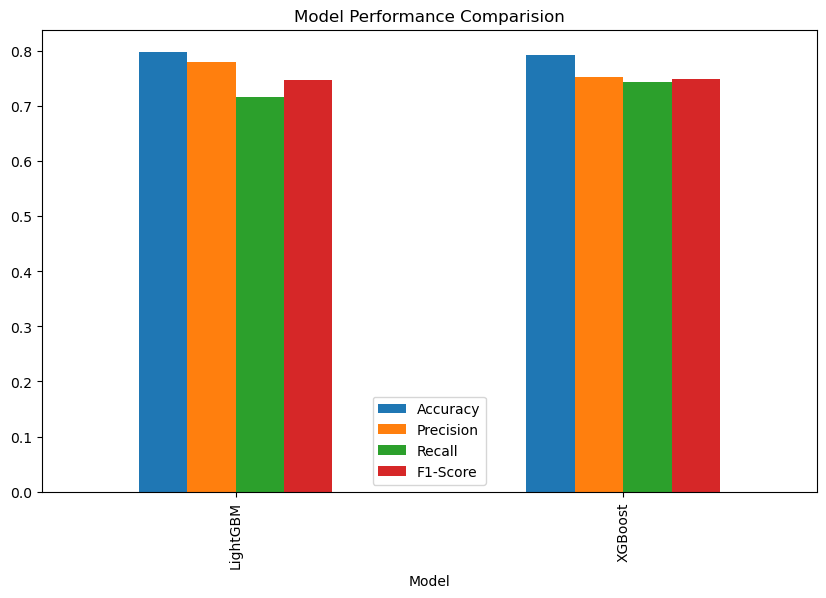

In [49]:
import matplotlib.pyplot as plt
comparision_df = pd.DataFrame({
     'Model': ['LightGBM', 'XGBoost'],
     'Accuracy': [lgb_metrics[0], xgb_metrics[0]],
     'Precision': [lgb_metrics[1], xgb_metrics[1]],
     'Recall': [lgb_metrics[2], xgb_metrics[2]],
     'F1-Score': [lgb_metrics[3], xgb_metrics[3]]
 })

comparision_df.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1-Score'], kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparision")
plt.show()

In this I have created a data frame named 'comparison_df' to store the performance metrics of two models: LightGBM and XGBoost.Then I used this data frame to generate a bar chart that visually compares the performance of the two models across the different metrics. The bar chart provides a clear and concise way to observe which model performs better in each category. The chart is titled "Model Performance Comparision" and is displayed using MatplotLibs 'plt.show()' function.

After training and evaluating both LightGBM and XGBoost models on the dataset 
Both models achieved similar accuracy with LightGBM slightly outperforming XGBoost in terms of accuracy by a small margin of 0.56%. When looking at other metrics XGBoost has a higher Recall and a marginally better F1-Score(74.83% compared to 74.65%)
XGBoost's higher Recall suggests it is slightly better at identifying positive cases in the dataset which is important when the cost of missing positive cases is high. The F1-Score which balances Precision and Recall also indicates that XGBoost has a slight edge. Therefore in practical applications where capturing as many positive cases as possible is important XGBoost might be the better choice despite the minor difference in accuracy.